In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_df = pd.read_csv(f"C:\\Users\\johnh\\OneDrive\\Documents\\공부\\2023년\\인공지능프로젝트\\기말프로젝트\\final_data\\\data_by_all_20230518.csv",
                      header=0)

In [3]:
data_df.head(5)
data_df.columns

Index(['ID', 'fertilizer_price_index_all', 'fertilizer_price_index_nitrogen',
       'fertilizer_price_index_phosphate', 'oil_price',
       'meat_total(kg/capita)', 'meat_total_us(lb/capita)',
       'fruits(kg/capita)', 'vegetable(kg/capita)', 'coffee_us(gal/capita)',
       'tea_us(gal/capita)', 'cocoa_us(lb/capita)', 'co2(ppm)',
       'population_us_total', 'population_us_asian', 'population_world',
       'population_asia_all', 'population_asia_east&southeast', 'cpi_us',
       'gini_us', 'harvestedarea_rice_asia(ha)', 'yield_rice_asia(hg/ha)',
       'production_rice_asia(ton)', 'food_consumption_us(kcal)',
       'crop_price_us'],
      dtype='object')

### US, ASIA 인구 합 시각화

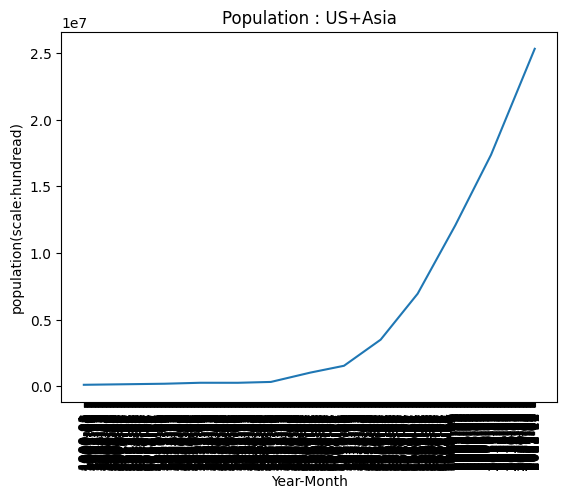

In [9]:
x = list(data_df['ID'])
y = list(data_df['population_us_asian'])

# 그래프 생성
plt.plot(x, y)

# X축 레이블 및 기울기 설정
plt.xticks(rotation=90)
plt.xlabel('Year-Month')

# Y축 레이블 설정
plt.ylabel('population(scale:hundread)')

# 그래프 제목 설정
plt.title('Population : US+Asia')

# 그래프 출력
plt.show()

### Population의 다른 Feature과의 상관관계 확인

In [11]:
#data_df.loc['fertilizer_price_index_all':].corr()['cpi_us'].sort_values(ascending=False)
temp_data=data_df.loc[:, ['fertilizer_price_index_all', 'fertilizer_price_index_nitrogen',
       'fertilizer_price_index_phosphate', 'oil_price',
       'meat_total(kg/capita)', 'meat_total_us(lb/capita)',
       'fruits(kg/capita)', 'vegetable(kg/capita)', 'coffee_us(gal/capita)',
       'tea_us(gal/capita)', 'cocoa_us(lb/capita)', 'co2(ppm)',
        'cpi_us','population_us_asian',
       'gini_us', 'harvestedarea_rice_asia(ha)', 'yield_rice_asia(hg/ha)',
       'production_rice_asia(ton)', 'food_consumption_us(kcal)',
       'crop_price_us']]
temp_data.corr()['population_us_asian'].sort_values(ascending=False)

population_us_asian                 1.000000
cpi_us                              0.983484
fertilizer_price_index_nitrogen     0.949430
fertilizer_price_index_all          0.946359
production_rice_asia(ton)           0.924531
fertilizer_price_index_phosphate    0.923722
yield_rice_asia(hg/ha)              0.919505
crop_price_us                       0.911645
oil_price                           0.868533
meat_total(kg/capita)               0.859320
vegetable(kg/capita)                0.856316
co2(ppm)                            0.845014
gini_us                             0.835537
food_consumption_us(kcal)           0.835159
harvestedarea_rice_asia(ha)         0.834690
fruits(kg/capita)                   0.792329
cocoa_us(lb/capita)                 0.753144
meat_total_us(lb/capita)            0.735552
tea_us(gal/capita)                  0.289868
coffee_us(gal/capita)              -0.486241
Name: population_us_asian, dtype: float64

### ARIMA 통계 모델(AutoRegressive Integrated Moving Average)을 사용한 시계열 예측

- ARIMA : 시계열 데이터를 분석하고 예측하기 위해 사용, 자기회귀(Auto Regressive), 누적 차분(Integrated), 이동 평균(Moving Average) 세가지 요소를 결합한 모델로 통계적 모델.
- CPI에 Outlier가 없고, 추세가 중요해보임, 장기적인 예측도 할 필요가 없이 앞으로 1~2년 데이터에 대한 예측만을 필요로 하므로 ARIMA를 사용해봄.

---
- p, q : 자기상관 함수, 부분자기상관 함수 - 통계적으로 유의한 시차에서 감소되는 패턴을 파악하여 p, q 값을 설정. 여기서는 p=2, q=0으로 설정하여 자기 상관함수만 값을 줬음. q 값은 이전 예측 오차들의 선형 조합 예측이므로 0을 줘 값을 넣지 않았음. p는 자기 회귀 값을 선형 조합으로 예측하는 값이기 때문에 2를 넣어서 가장 크게 반영 함.
- d : 차분(Differencing) - 시계열 데이터를 정상 시계열로 변환하기 위한 차분(Differencing) 횟수를 의미. 시계열 데이터가 정상성을 가지지 않을 때, 차분을 통해 추세나 계절성 요소를 제거하고 정상성을 확보. d=1로 설정함. cpi data에는 outlier가 거의 없기 때문에 1의 값을 줌.

In [12]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\johnh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\johnh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\johnh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\johnh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2023-01-01    2.539269e+07
2023-02-01    2.544836e+07
2023-03-01    2.550402e+07
2023-04-01    2.555968e+07
2023-05-01    2.561534e+07
2023-06-01    2.567099e+07
2023-07-01    2.572663e+07
2023-08-01    2.578227e+07
2023-09-01    2.583790e+07
2023-10-01    2.589352e+07
2023-11-01    2.594914e+07
2023-12-01    2.600474e+07
Freq: MS, Name: predicted_mean, dtype: float64


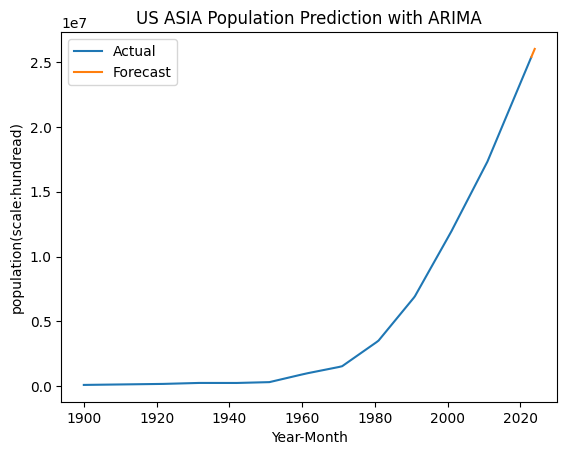

In [14]:
# 데이터 불러오기
data_arima = data_df.loc[:, ['ID', 'population_us_asian']]

data_arima['ID'] = pd.to_datetime(data_arima['ID'], format='%Y-%m') 
data_arima.set_index('ID', inplace=True)  # 날짜 열을 인덱스로 설정
pop_data = data_arima['population_us_asian']

p, d, q = 2, 1, 0
# ARIMA 모델 학습
model = ARIMA(pop_data, order=(p, d, q))
model_fit = model.fit()

# 미래 예측
future_periods = 12 # 미래의 몇 개월까지 예측할 것인지 설정
forecast = model_fit.forecast(steps=future_periods)

# 예측 결과 출력
print(forecast)

# 그래프로 시각화
plt.plot(data_arima, label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Year-Month')
plt.ylabel('population(scale:hundread)')
plt.title('US ASIA Population Prediction with ARIMA')
plt.legend()
plt.show()

### LSTM 모델을 이용한 CPI 지수 예측

- 연-월을 Input으로 넣고 CPI 지수를 target value로 설정
- sequence length를 8로 설정하여 추세를 그리도록 하였음. 이번에는 2년치의 데이터를 참고했을 때 오히려 긴 경향성에 따라 인구수가 매우 빠르게 증가하는 경향을 관찰 할 수 있었음. 8개월로 설정하여 적당한 값의 인구 수를 예측할 수 있도록 함.

In [4]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [5]:
# 데이터 불러오기
data_lstm = data_df.loc[:, ['ID', 'population_us_asian']]

data_lstm['ID'] = pd.to_datetime(data_lstm['ID'], format='%Y-%m') 
data_lstm.set_index('ID', inplace=True)  # 날짜 열을 인덱스로 설정
pop_data = data_lstm['population_us_asian']

In [6]:
scaler = MinMaxScaler()  # 데이터 스케일링을 위한 scaler 객체 생성
scaled_data = scaler.fit_transform(pop_data.values.reshape(-1, 1))  # 데이터 스케일링 적용

In [7]:
# 시퀀스 데이터 생성
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return torch.tensor(X).float(), torch.tensor(y).float()

In [38]:
# 전체 데이터셋을 학습시킴

sequence_length = 6 # 시퀀스 길이 설정
X_train, y_train = create_sequences(scaled_data, sequence_length)

In [39]:
# LSTM 모델 구성
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        output, _ = self.lstm(x)
        output = output[:, -1, :]
        output = self.fc(output)
        return output

In [40]:
input_size = 1
hidden_size = 64
output_size = 1

model = LSTMModel(input_size, hidden_size, output_size)

# 모델 학습
learning_rate = 0.001
num_epochs = 200

In [41]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [42]:
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

Epoch [10/200], Loss: 0.082242
Epoch [20/200], Loss: 0.060593
Epoch [30/200], Loss: 0.046360
Epoch [40/200], Loss: 0.027328
Epoch [50/200], Loss: 0.005791
Epoch [60/200], Loss: 0.002673
Epoch [70/200], Loss: 0.001000
Epoch [80/200], Loss: 0.001010
Epoch [90/200], Loss: 0.000599
Epoch [100/200], Loss: 0.000545
Epoch [110/200], Loss: 0.000412
Epoch [120/200], Loss: 0.000346
Epoch [130/200], Loss: 0.000278
Epoch [140/200], Loss: 0.000222
Epoch [150/200], Loss: 0.000175
Epoch [160/200], Loss: 0.000136
Epoch [170/200], Loss: 0.000105
Epoch [180/200], Loss: 0.000080
Epoch [190/200], Loss: 0.000060
Epoch [200/200], Loss: 0.000045


In [43]:
# 테스트 데이터 생성 2023-01 부터 2023-12 까지.
test_dates = pd.date_range(start='2023-01', end='2032-12', freq='MS')
print(test_dates)

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01',
               ...
               '2032-03-01', '2032-04-01', '2032-05-01', '2032-06-01',
               '2032-07-01', '2032-08-01', '2032-09-01', '2032-10-01',
               '2032-11-01', '2032-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')


In [44]:
# 테스트 데이터 예측
with torch.no_grad():
    test_inputs = torch.tensor(scaled_data[-sequence_length:]).unsqueeze(0).float()
    predicted = []
    
    for _ in range(len(test_dates)):
        output = model(test_inputs)
        predicted.append(output.item())
        
        test_inputs = torch.cat((test_inputs[:, 1:, :], output.unsqueeze(0)), dim=1)

In [45]:
# 예측 결과 출력
predicted = scaler.inverse_transform(np.array(predicted).reshape(-1, 1)).flatten()

for date, prediction in zip(test_dates, predicted):
    print(f'{date.strftime("%Y-%m")}: {prediction:.2f}')

2023-01: 25602660.30
2023-02: 25681029.73
2023-03: 25766986.21
2023-04: 25861507.06
2023-05: 25964986.22
2023-06: 26077495.87
2023-07: 26198353.37
2023-08: 26291436.80
2023-09: 26388327.29
2023-10: 26487776.86
2023-11: 26588197.75
2023-12: 26687794.68
2024-01: 26784736.29
2024-02: 26877371.65
2024-03: 26970190.46
2024-04: 27062359.71
2024-05: 27153193.79
2024-06: 27242289.74
2024-07: 27329521.25
2024-08: 27415104.84
2024-09: 27499518.65
2024-10: 27582489.02
2024-11: 27663874.63
2024-12: 27743645.39
2025-01: 27821843.41
2025-02: 27898531.84
2025-03: 27973731.73
2025-04: 28047391.96
2025-05: 28119503.50
2025-06: 28190069.37
2025-07: 28259125.64
2025-08: 28326672.32
2025-09: 28392730.47
2025-10: 28457288.04
2025-11: 28520363.09
2025-12: 28581970.64
2026-01: 28642131.76
2026-02: 28700855.45
2026-03: 28758159.77
2026-04: 28814056.74
2026-05: 28868570.42
2026-06: 28921721.86
2026-07: 28973517.07
2026-08: 29023986.13
2026-09: 29073150.08
2026-10: 29121029.98
2026-11: 29167637.86
2026-12: 2921

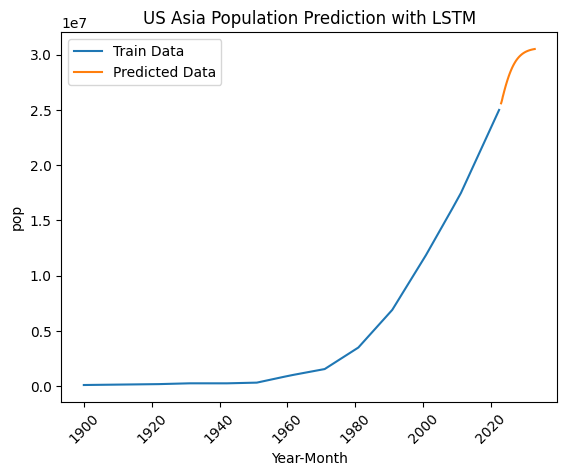

In [46]:
# 학습 데이터와 예측 결과 시각화
train_dates = data_lstm.index[:-sequence_length]

plt.plot(train_dates, pop_data[:-sequence_length], label='Train Data')
plt.plot(test_dates, predicted, label='Predicted Data')
plt.xlabel('Year-Month')
plt.ylabel('pop')
plt.title('US Asia Population Prediction with LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.show()